In [0]:
# Run this command first to install this python library required for the rest of the exercise.
!pip install mglearn

     |████████████████████████████████| 542kB 4.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582706 sha256=67f67c0e5834faef59c0f6151f42c573713ba8e071cbfe0f8087df50025b5d84
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("Pandas version: {}".format(pd.__version__))

import matplotlib

import matplotlib.pyplot as plt
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

import mglearn

Python version: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Pandas version: 0.24.2
matplotlib version: 3.0.3
NumPy version: 1.16.4
SciPy version: 1.3.0
IPython version: 5.5.0
scikit-learn version: 0.21.3


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Example 1: Classifying IRIS data



In [0]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))
print("Target Names: {}".format(iris_dataset['target_names']))
print("Feature names: \n{}".format(iris_dataset['feature_names']))
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))
print("Type of target: {}".format(type(iris_dataset['target'])))
print("Shape of target: {}".format(iris_dataset['target'].shape))
print("Target:\n{}".format(iris_dataset['target']))
print(iris_dataset['DESCR'][:193] + "\n...")


Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Target Names: ['setosa' 'versicolor' 'virginica']
Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 nu

In [0]:
# Prepare Training and Testing Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6317861400>,
      dtype=object)

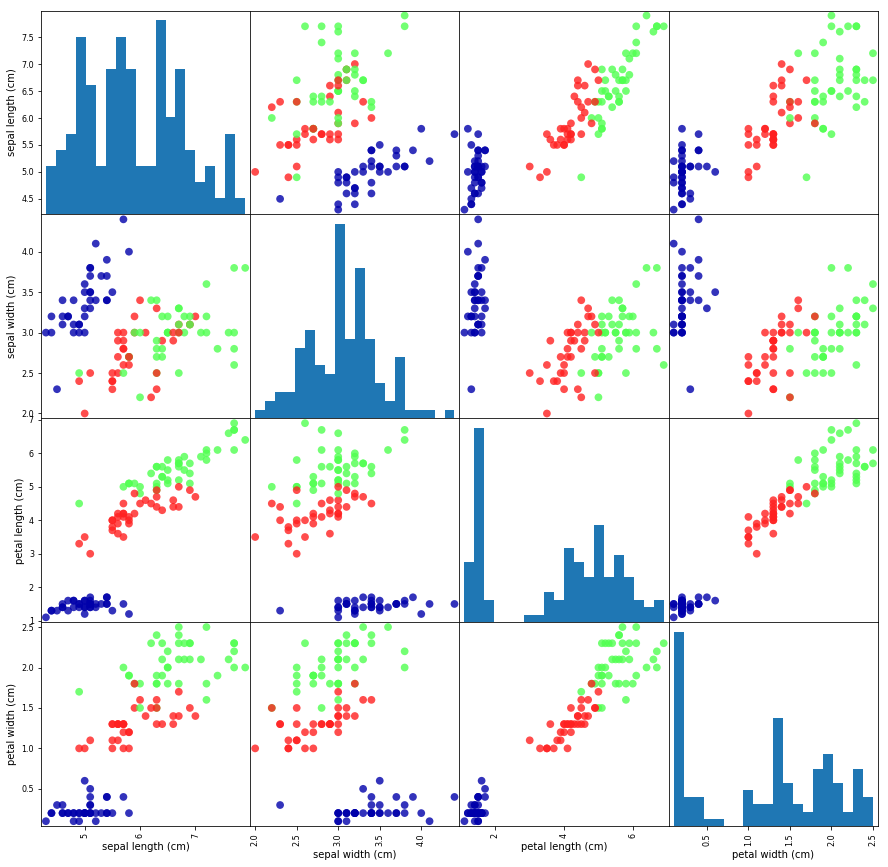

In [0]:
# Data visualization
# create dataframe from X_train
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create scatter_matrix from dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=0.8, cmap=mglearn.cm3)

In [0]:
# Use K-Neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Make predictions
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
    iris_dataset['target_names'][prediction]))

# Evaluate the model - Test
y_pred = knn.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))
print("Test set score1: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score2: {:.2f}".format(knn.score(X_test, y_test)))

X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']
Test set predictions: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score1: 0.97
Test set score2: 0.97


## 1. K-Nearest Neighbor (K-NN) Classifier

### Example 1.1: Forge Dataset

* Case 1: k = 1. Each data point is assigned a class label of its nearest neighboring data point.
* Case 2: k = 3. voting is used to decide the class label for the new data. 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


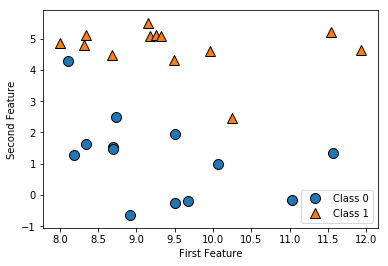

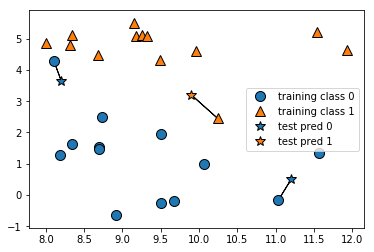

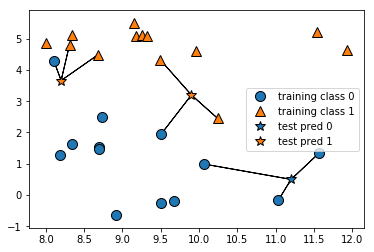

In [0]:
# Forge Dataset
X, y = mglearn.datasets.make_forge()

# plot dataset
plt.figure(1)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: {}".format(X.shape))

# Applying k-NN to classify this data
plt.figure(2)
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.figure(3)
mglearn.plots.plot_knn_classification(n_neighbors=3)



__Decision boundary__

* k = 1, the model is more complex and it tries to overfit the training data.
* As k increases, the model generalization capability increases and model becomes simpler. 

Also, here we will see how to use scikit-learn to train a Nearest Neighbor classifier. 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


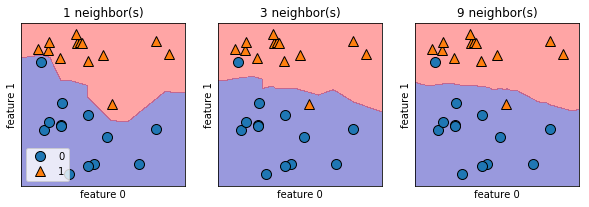

In [0]:
# k-NN classifier from scikit-learn
# Analyze the decision boundary 

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

# Analyze
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


### Example 1.2:  Breast Cancer dataset

It shows how increasing the number of neighbors improves the generalization. The training accuracy decreases with increasing number of nearest neighbors. However too simple model (k = 10) may lead to underfitting with bad performance with both training and test dataset. The best solution lies somewhere in the middle with k=6 that provides highest test accuracy. 


Shape of cancer data: (569, 30)
cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


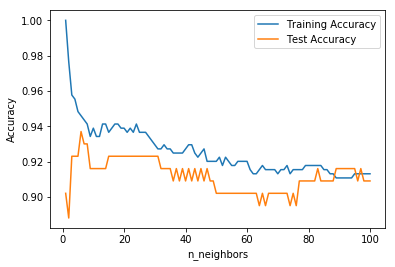

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

# load data
cancer = load_breast_cancer()

# Analyze the data
print("Shape of cancer data: {}".format(cancer.data.shape))
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))

# Create training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1,101)

for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy 
  test_accuracy.append(clf.score(X_test, y_test))
  
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

## K-Neighbors Regression

### Example 1.3: Wave Dataset

It is a one-dimensional dataset having only one feature with continuous target values. 

for k = 1, test input data takes the target value corresponding to the nearest data point.
for k > 1, test input data takes the target value which is the average of target values for all its k nearest neighbors.

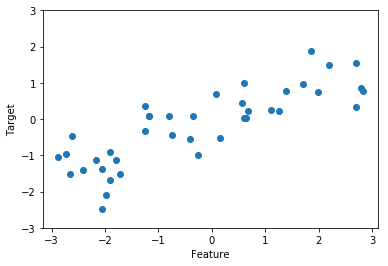

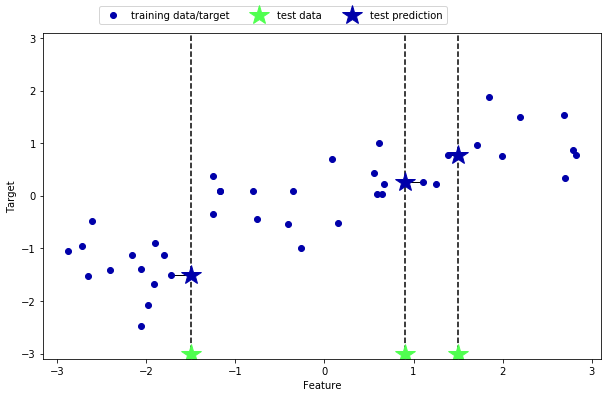

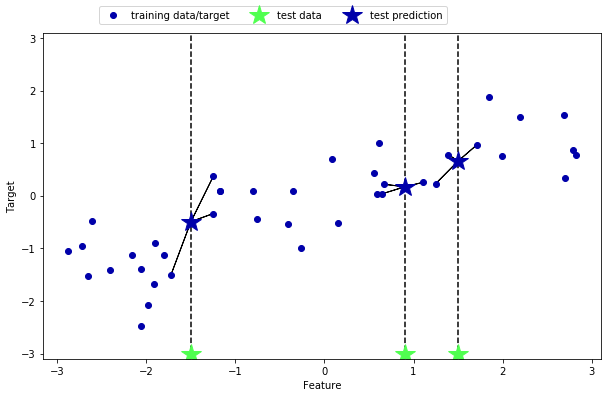

In [0]:
# Wave dataset
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

# Try knn regression
mglearn.plots.plot_knn_regression(n_neighbors=1)
mglearn.plots.plot_knn_regression(n_neighbors=3)

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


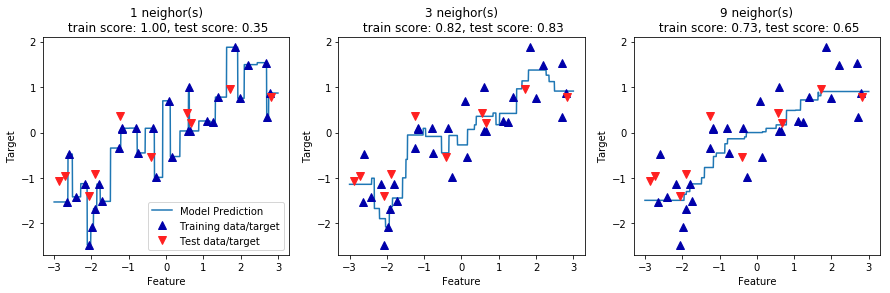

In [0]:
# Let's try the scikit learn for KNN regression

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))


## Analyzing KNeighborsRegressor
fix, axes = plt.subplots(1, 3, figsize=(15,4))

# create 100 data points evenly spaced between -3 and 3
line = np.linspace(-3,3,1000).reshape(-1,1)  # column vector

for n, ax in zip([1,3,9], axes):
  reg = KNeighborsRegressor(n_neighbors=n)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
  
  ax.set_title("{} neighor(s)\n train score: {:.2f}, test score: {:.2f}".format(n, reg.score(X_train, y_train), reg.score(X_test, y_test)))
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
  
axes[0].legend(["Model Prediction", "Training data/target", "Test data/target"], loc="best")

## 2. Linear Models for Regression

w[0]: 0.393906  b: -0.031804


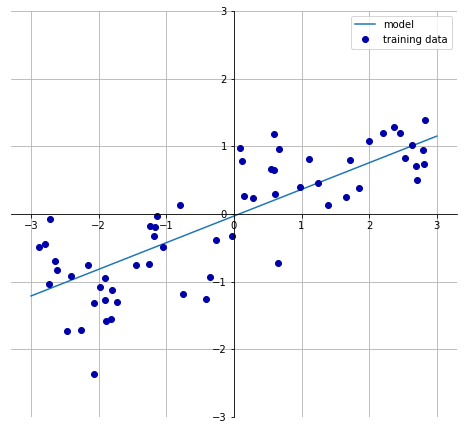

In [0]:
# Fit a linear model to the wave data
mglearn.plots.plot_linear_regression_wave()


In [0]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))  # weights
print("lr.intercept_: {}".format(lr.intercept_)) # offset / intercept

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


### Example 2.1: Boston Housing Dataset


* Difference between training and test score indicate that the model is overfitting the data.  Simple linear model overfits the training data
* By using L2 regularization on weight vector, overfitting can be avoided. This is achieved by the Ridge regression model. 
* Alpha denotes the weightage of regularization term on output prediction. In other words, this defines the trade-off between model complexity (small values of weights) and training performance. 
* As the alpha value is increased, the coefficient magnitudes decrease (become smaller) as shown in the plot below.
* Try different values of alpha = 1, 0.1, 10. alpha = 0.1 seems to be best value for the model.


X.shape: (506, 104)
Training set score: 0.95
Test set score: 0.61

After Regularization ... 

Training set score: 0.89
Test set score: 0.75
--------------------
size of coeff vector for ridge: (104,)


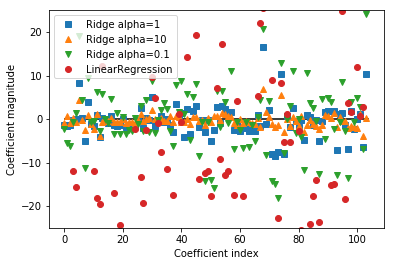

In [0]:
# Overfitting Model - Ordinary least squares
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a linear model
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# Ridge Regression with L2 Regularization
from sklearn.linear_model import Ridge

print("\nAfter Regularization ... \n")
ridge = Ridge().fit(X_train, y_train) # alpha = 1
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("--------------------")

ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

print("size of coeff vector for ridge: {}".format(np.shape(ridge.coef_)))


# Visualize the model coefficients
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

### Linear Models for Classification

The code below demonstrates the use of two linear classifiers namely, LinearSVC and LogisticRegression on Forge dataset. 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


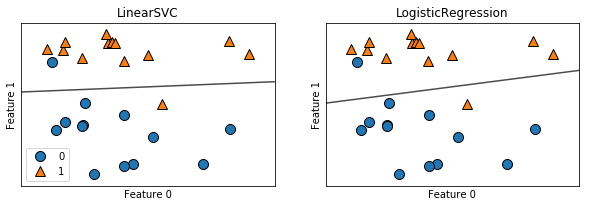

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax = ax, alpha = 0.7)
  mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax = ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
axes[0].legend()

### Linear models for multiclass classification

* binary classification is applied to multi-class classification by using one-vs-rest approach
* In other words there will be one binary classifier per class.  So each classifier will have its own set of coefficients (W) and intercept (b)


Coefficient shape:  (3, 2)
Intercept shape:  (3,)


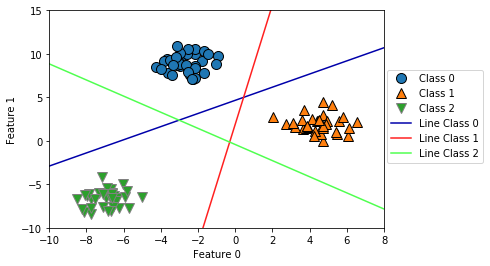

In [0]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
# plt.legend(["Class 0", "Class 1", "Class 2"])

# train a LinearSVC 
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)


line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, 
                                  linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept)/coef[1], c = color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.legend(["Class 0", "Class 1", "Class 2", "Line Class 0", "Line Class 1", 
            "Line Class 2"], loc = (1.01, 0.3))


## Naive Bayes Classifier

In [0]:
# Naive Bayes Classifier
from sklearn import metrics 
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 

# load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

classifier = GaussianNB()
model = classifier.fit(X_train, y_train)
print("Training score: {}".format(model.score(X_train, y_train)))
print("Test Score: {}".format(model.score(X_test, y_test)))

y_pred = model.predict(X_test)
print("Gaussian Naive Bayes model accuracy(in %):", 
      metrics.accuracy_score(y_test, y_pred)*100)



Training score: 0.9555555555555556
Test Score: 0.95
Gaussian Naive Bayes model accuracy(in %): 95.0


In [0]:
# Assigning features and label variables
outlook = ['Rainy', 'Rainy','Overcast','Sunny','Sunny', 'Sunny', 'Overcast', 
           'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny']
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild',
        'Mild','Mild','Hot','Mild']
humidity = ['high', 'high', 'high', 'high', 'normal','normal', 'normal', 'high',
            'normal', 'normal', 'normal', 'high', 'normal', 'high']
windy = ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'yes']
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes',
        'Yes','Yes','No']

# import label encoder
from sklearn import preprocessing

# creating an instance of label encoder
le = preprocessing.LabelEncoder()
outlook_enc = le.fit_transform(weather)
print("outlook: ", outlook_enc)

temp_enc = le.fit_transform(temp)
print("Temperature: ", temp_enc)

humidity_enc = le.fit_transform(humidity)
print("Humidity: ", humidity_enc)

wind_enc = le.fit_transform(windy)
print("Wind: ", wind_enc)

labels = le.fit_transform(play)
print("Play: ", labels)


features = zip(weather_enc, temp_enc, humidity_enc, wind_enc)
features = list(features)
print("Features:", features)

#from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

#model = BernoulliNB()
model = MultinomialNB()
model.fit(features, labels)

# #today = ['Sunny', 'hot', 'normal','no']
today = [[3, 1, 1, 0 ]]
predicted = model.predict(today)
print("Predicted output:", predicted)

outlook:  [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temperature:  [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity:  [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind:  [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play:  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Features: [(2, 1, 0, 0), (2, 1, 0, 1), (0, 1, 0, 0), (1, 2, 0, 0), (1, 0, 1, 0), (1, 0, 1, 1), (0, 0, 1, 1), (2, 2, 0, 0), (2, 0, 1, 0), (1, 2, 1, 0), (2, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (1, 2, 0, 1)]
Predicted output: [1]


## Decision Trees

First example demonstrates the use decision tree as a classifier. 



Accuracy on training set: 1.000
Accuracy on test set: 0.937
After restricting depth ...
Accuracy on training set: 0.988
Accuracy on test set: 0.951


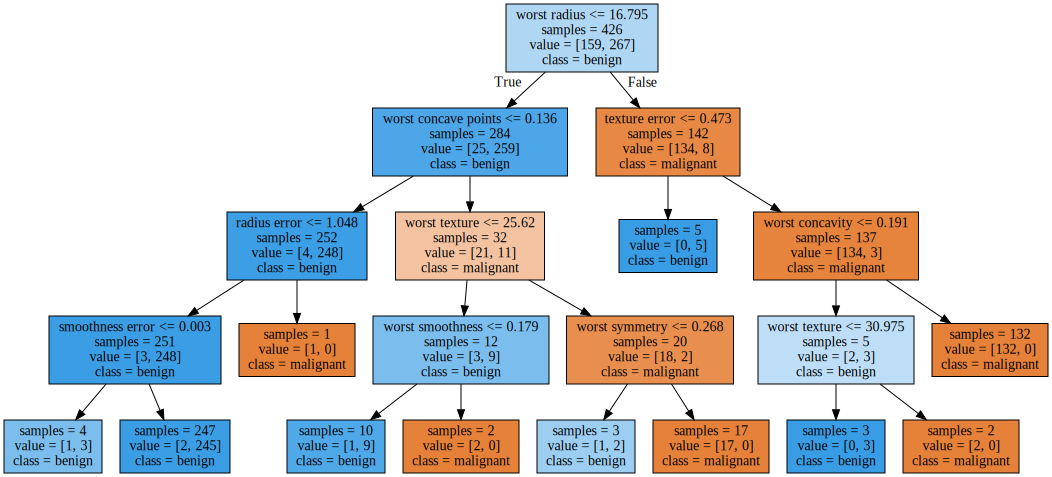

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


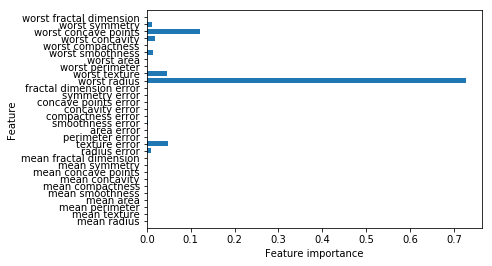

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

print("After restricting depth ...")
# restrict the depth of decision tree
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))



# Visualizing the tree
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names = ["malignant", "benign"],
               feature_names = cancer.feature_names, 
                impurity = False, filled = True)

import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

# Feature importance in trees
print("Feature importances:\n{}".format(tree.feature_importances_))



def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)


plot_feature_importances_cancer(tree)

**Decision tree as a regressor**

- The tree has no ability to generate new responses, outside of what was seen in the training.



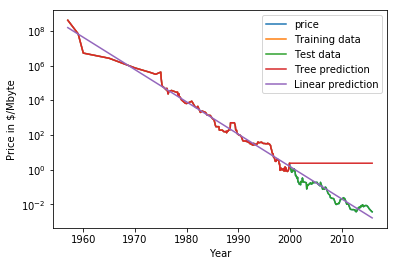

In [0]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
                                      "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

# train models
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict all data
X_all = ram_prices.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

# plot
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

#print("Shape of ram_prices.date:", np.shape(ram_prices.date))
#print("Shape of X_all:", np.shape(X_all))
#print("shape of data_train: ", np.shape(data_train))
#print("shape of X_train: ", np.shape(X_train))


### Random Forests



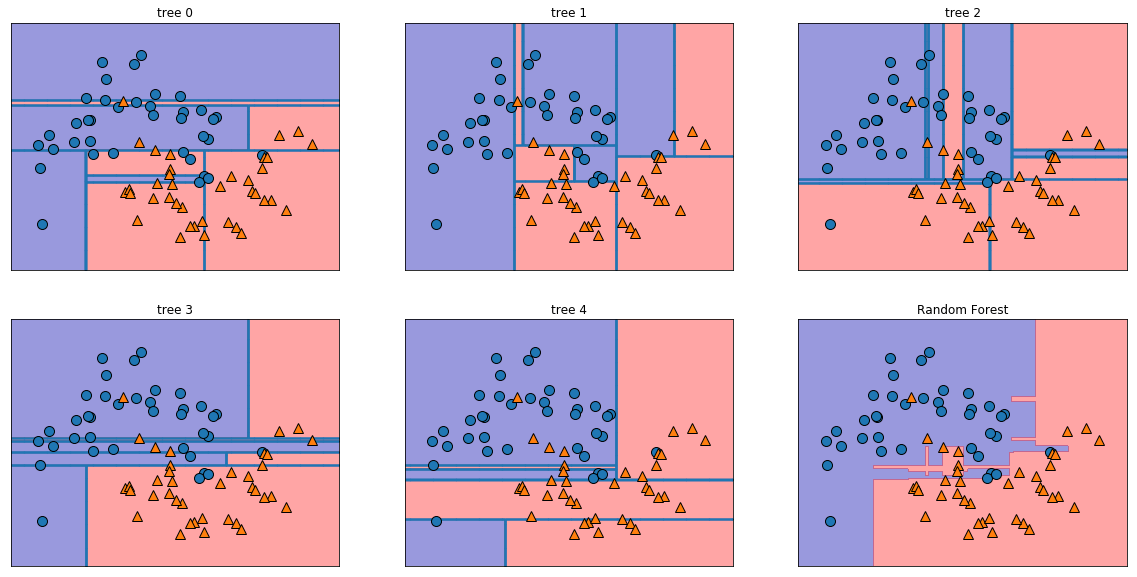

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    random_state = 42)
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)


# Visualize the decision boundaries learned by each tree
fig, axes = plt.subplots(2, 3, figsize = (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax = ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill = True, ax=axes[-1, -1],
                               alpha = 0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Accuracy on training set: 1.000
Accuracy on test set: 0.972


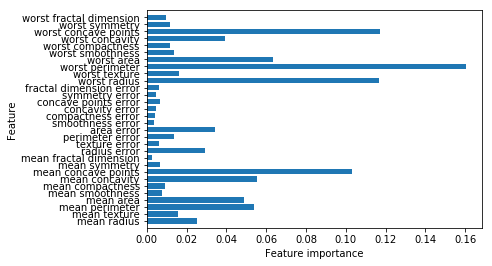

In [0]:
# Apply random forest to breast cancer data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

# this function is defined above. Please execute that block first.
plot_feature_importances_cancer(forest)

## Support Vector Machines

Few observations:

* the data is not linearly separable in a 2 dimensional plane. 
* In 3D, it is linearly separable by a plane. 
* this plane when projected to 2D space, it becomes an ellipse 

The basic idea is to project data to a higher dimensional space where it will be linearly separable.  This is done by using kernels.

There are two ways to map input data into a higher dimensional space:
* polynomial kernel
* Radial Basis Functions (RBF) - gaussian kernel

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

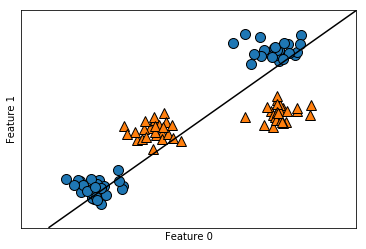

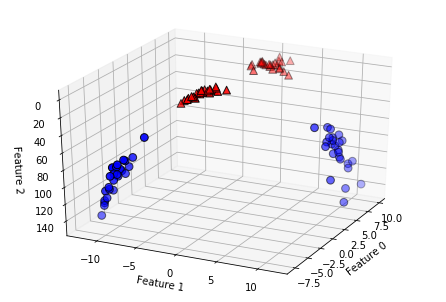

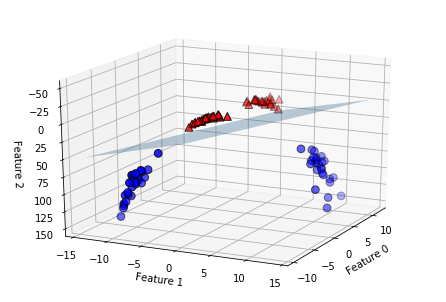

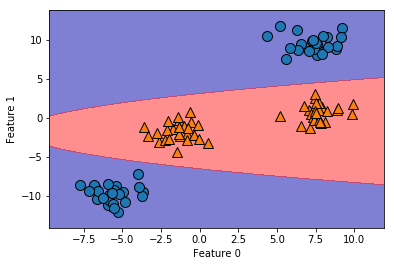

In [0]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D, axes3d

X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)

# Add another feature 
X_new = np.hstack([X, X[:,1:]**2])

# visualize this extended 3D data
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r',
          marker ='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 2")

# Apply SVM in 3D
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev = -160, azim = -26)
xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)
XX, YY = np.meshgrid(xx, yy)

# plane: AX + BY + CZ = 0
ZZ = (coef[0]*XX + coef[1]*YY + intercept) / (-coef[2])  
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r',
          marker ='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 2")

# draw a contour plot for the SVM decision boundary

figure = plt.figure()
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


__Support Vectors and Decision boundaries__

_Support vectors_ are data points that lie on the border between the clases. 

Gaussian / RBF Kernel: $k_{rbf} = exp(-\gamma\|x_1-x_2\|^2)$

There are two parameters to adjust: the $C$ parameter and the `gamma` parameter. 

* `gamma` refers to the inverse of the width of the Gaussian Kernel.
* `gamma` determines how far the influence of each data point reaches.  Low value corresponds to a far reach and high values to a limited reach. 
*  The $C$ parameter is a regularization parameter. It limits the importance of each  point (or their corresponding coefficients)


Let us analyze the effect of tuning these parameters. See the second array of figures below: 

* `gamma` value is increased from 0.1 to 10 from left to right. A small `gamma` means large radius for the Gaussian Kernel affecting a large number of neighboring data points. This is reflected in smooth decision boundries. Large `gamma` values means smaller radius for Gaussian kernel and hence the decision boundary responds to each point and hence more discontinuous.  
* Low `gamma` value means simpler model with smooth decision boundaries. High values lead more complex model with abrupt or discontinuous decision boundaries. 
* the $C$ parameter increases from 0.1 to 1000 from top to bottom. 
* Smaller $C$ values means a very restricted model where each data point can only have very limited influence. Large values correspond to a model with no restriction leading to overfitting. The decision boundary responds to each data point. 




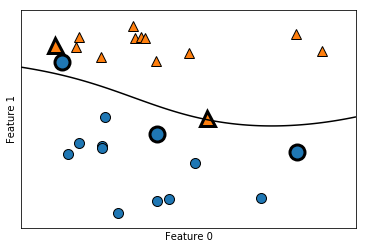

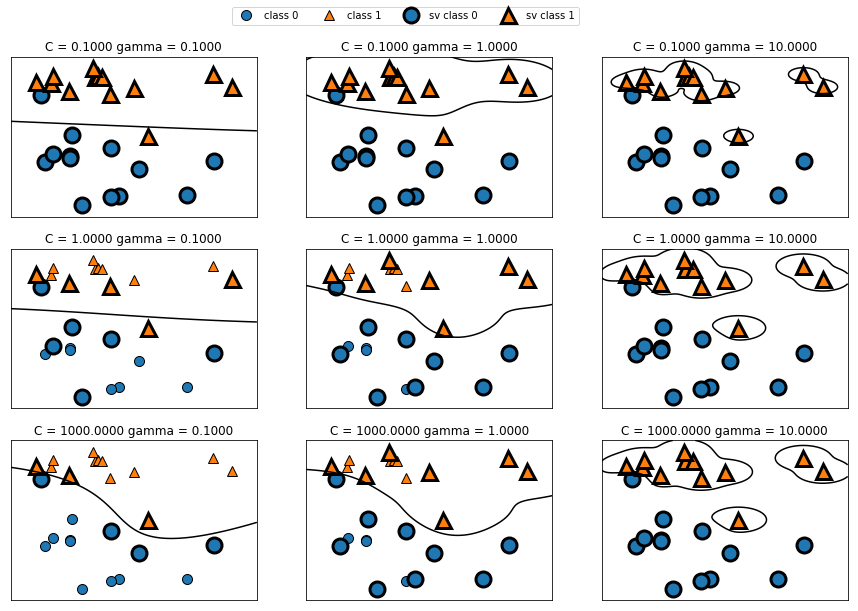

In [0]:
from sklearn.svm import SVC

# support vectors and decision boundary
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


# tuning the SVM parameters

fig, axes = plt.subplots(3,3, figsize =(15,10))
for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip (ax, range(-1,2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax = a)
axes[0,0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], 
                ncol=4, loc=(0.9,1.2))

Let's apply SVM to the Breast Cancer Data set

* Default model SVC overfits the data producing a score 1 for training data and only 0.6 for test dataset.
* On analyzing magnitude of features, it is realized that the different features have diffierent orders of magnitude.  
* SVMs are sensitive to data scaling and parameter tuning.




/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



SVM parameters on original data with default parameters

Accuracy on training set: 1.00
Accuracy on test set: 0.63

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

SVM performance after data rescaling

Accuracy on training set: 0.948
Accuracy on test set: 0.951

SVM performance after parameter turning on transformed data 

Accuracy on training set: 0.988
Accuracy on test set: 0.972



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


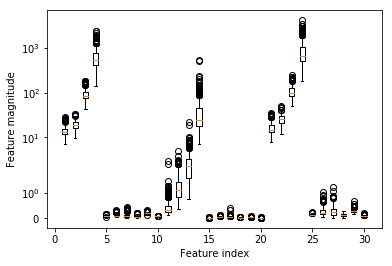

In [0]:
# Try SVM classification to Breast Cancer Data

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("\nSVM parameters on original data with default parameters\n")
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}\n".format(svc.score(X_test, y_test)))


# Analyze the dataset
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

# Pre-process the input data
# rescale the data points between 0 & 1

min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

# use THE SAME transformation on the test set,
# using min and range of the training set 
X_test_scaled = (X_test - min_on_training) / range_on_training

print ("\nSVM performance after data rescaling\n")
# train SVM on transformed dataset
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

print("\nSVM performance after parameter turning on transformed data \n")
# Now tune the SVC parameters
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}\n".format(svc.score(X_test_scaled, y_test)))

## Artificial Neural Networks (ANN)


Text(0, 0.5, 'Feature 1')

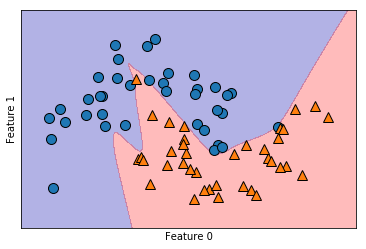

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    random_state = 42)
mlp = MLPClassifier(solver='lbfgs', random_state = 0, 
                    hidden_layer_sizes=[10, 10], activation = 'tanh')
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


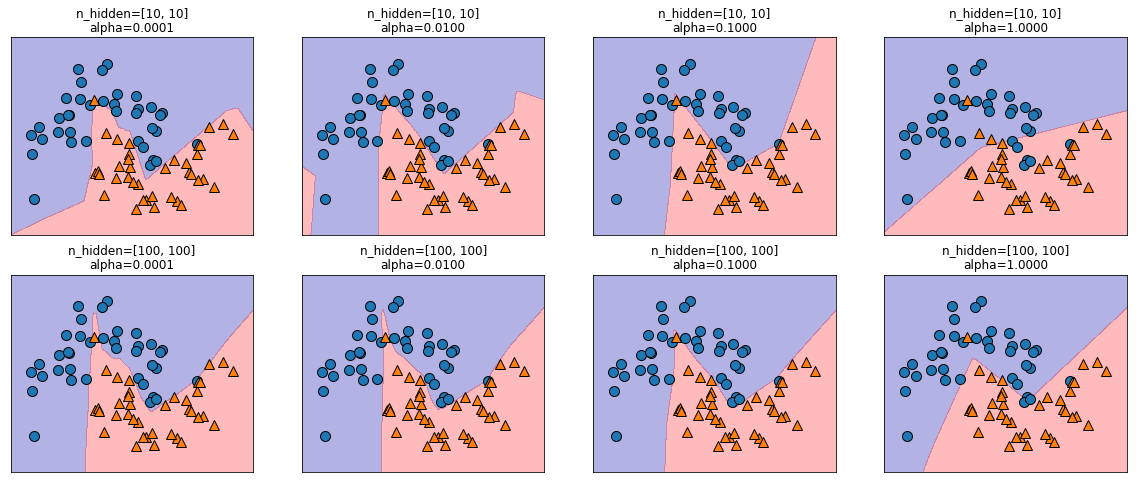

In [0]:
# Effect of L2 regularization is controlled using the parameter alpha.

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                        hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], 
                        alpha=alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
        n_hidden_nodes, n_hidden_nodes, alpha))

Cancer data per-feature maxima: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
Accuracy on training set: 0.94
Accuracy on test set: 0.92


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



MLP performance after data rescaling

Accuracy on training set: 0.991
Accuracy on test set: 0.965

MLP performance after introducing regularization

Accuracy on training set: 0.988
Accuracy on test set: 0.972


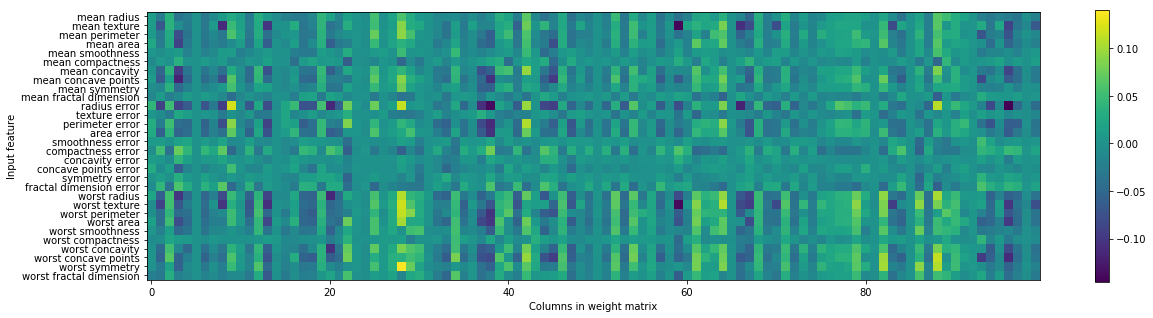

In [0]:
# Breast Cancer Dataset

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 

cancer = load_breast_cancer()
print("Cancer data per-feature maxima: \n {}".format(cancer.data.max(axis=0)))
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

# Data Pre-processing - normalization
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("\nMLP performance after data rescaling\n")
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("\nMLP performance after introducing regularization\n")
# increase the maximum number of iterations
mlp = MLPClassifier(max_iter=1000, alpha = 1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


# Show the values of weights
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

# Unsupervised Learning Algorithms


## Data preprocessing / scaling


In [0]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Breast Cancer Dataset
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,random_state=1)
print(X_train.shape)
print(X_test.shape)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # computes max and min value of each feature
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

np.set_printoptions(formatter={'float': lambda x: "{0:4.2f}".format(x)})
#np.set_printoptions(precision=3)

# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))


from sklearn.svm import SVC

svm = SVC(C=100)
svm.fit(X_train, y_train)
svm.fit(X_train_scaled, y_train)

print ("\nSVM Performance:")

print("Test Set Accuracy: {:.2f}".format(svm.score(X_test, y_test)))
print("Scaled test set Accuracy: {:.2f}\n".format(svm.score(X_test_scaled, y_test)))

(426, 30)
(143, 30)
transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.98 9.71 43.79 143.50 0.05 0.02 0.00 0.00 0.11 0.05 0.12 0.36 0.76 6.80
 0.00 0.00 0.00 0.00 0.01 0.00 7.93 12.02 50.41 185.20 0.07 0.03 0.00 0.00
 0.16 0.06]
per-feature maximum before scaling:
 [28.11 39.28 188.50 2501.00 0.16 0.29 0.43 0.20 0.30 0.10 2.87 4.88 21.98
 542.20 0.03 0.14 0.40 0.05 0.06 0.03 36.04 49.54 251.20 4254.00 0.22 0.94
 1.17 0.29 0.58 0.15]
per-feature minimum after scaling:
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00]
per-feature maximum after scaling:
 [1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 1.00 1.00]

SVM Performance:
Test Set Accuracy: 0.62
Scaled test set Accuracy: 0.97



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

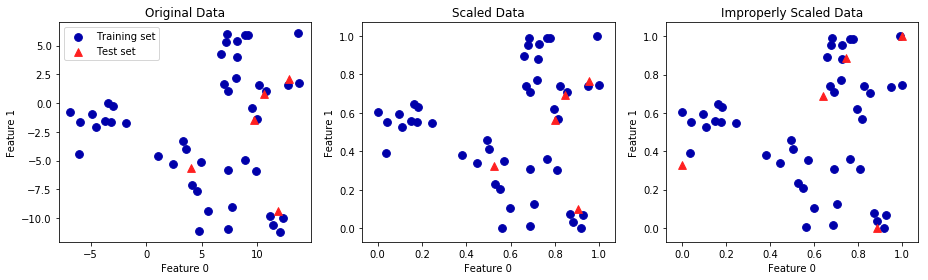

In [0]:
import matplotlib.pyplot as plt
import mglearn

from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1],
c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
fig.tight_layout()

## K-Means Clustering

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


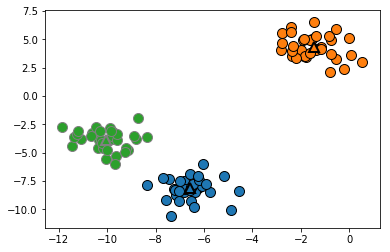

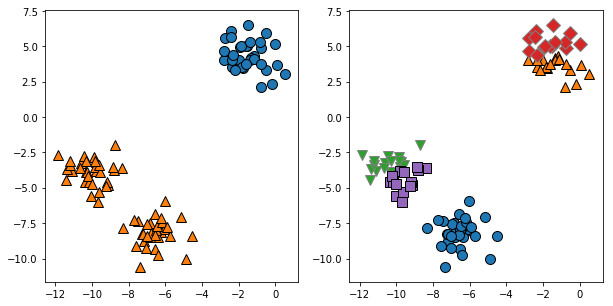

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print("Cluster memberships:\n{}".format(kmeans.labels_))

# predict class labels for new data
print(kmeans.predict(X))

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


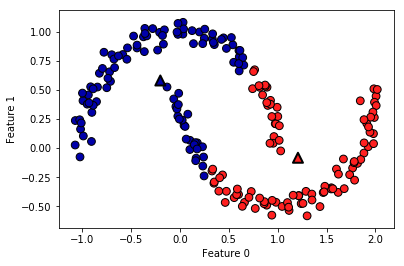

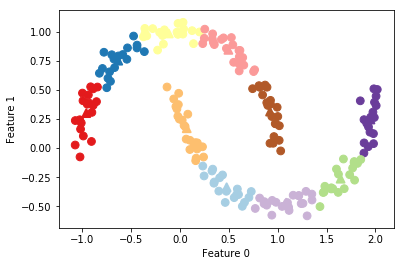

In [0]:

# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


figure = plt.figure()

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

# Deep Learning



## IMDB dataset

It has 25,000 entries in the training set and 25,000 in test set. Only first 10,000 words in the reviews are considered as the input feature vector for each entry.  The output is either a positive review or a negative review. It is a binary classification problem.


Some of the other points to note here are as follows:

* For a binary classification problem, one should use 'binary_crossentropy' as the loss function.
* 'adam' optimizer gives slightly better performance than 'rmsprop'
* since the output can be 0 or 1, it is better to use 'sigmoid' as the activation function for the output layer node. 
* a sigmoid output activation function is used to ensure that the output remains in the range of (0,1)


In this case, you can see a case of overfitting. Some of the ways, you can deal with overfitting are

* Try a simpler architecture - less number of hidden layers and nodes. For instance, try a 4-4-1 network. 
* Get more training data
* Try Weight regularization term 
* Try dropout 




In [0]:
# Download the IMDB dataset

#--------------------------------------------
import numpy as np
from keras.datasets import imdb

# Load IMDB Review dataset

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old
# #-------------------------------

# from keras.datasets import imdb
# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(
#     num_words = 10000)

# Analyze the data
print("train data 0:", train_data[0])
print("train_data shape:", train_data.shape)
print("length of train_data[0]", len(train_data[0]))
print("train label 0:", train_labels[0])


word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key)
                          for (key, value) in word_index.items()])
decoded_review = ' '.join([
    reverse_word_index.get(i-3, '?') for i in train_data[0]
])

print("Decoded Review for train_data[0]:", decoded_review)


# Prepare your data
def vectorize_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

print("x_train:", x_train)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print("y_train:", y_train)
print("y_test:", y_test)


TypeError: ignored

In [0]:
# Create a NN model
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



model.compile(optimizer='rmsprop', loss='binary_crossentropy',
            metrics=['accuracy'])

# from keras import optimizers
# from keras import losses
# from keras import metrics
# model.compile(optimzer=optimizers.RMSprop(lr=0.001), 
#              loss=losses.binary_crossentropy,
#              metrics=[metrics.binary_accuracy])


# Setting aside a validation set
x_val = x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]


# train the model
print("Training the model ... Wait!")
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512, 
                   validation_data=(x_val, y_val),
                   verbose=0)
print("training ends ....")

# Evaluate the model on test data
results = model.evaluate(x_test, y_test)
print("Loss on test dataset: ", results[0])
print("Accuracy on test dataset: ", results[1])
print("\n")

# Predict the output
print(model.predict(x_test))

Training the model ... Wait!
training ends ....
25000/25000 [==============================] - 2s 70us/step
Loss on test dataset:  0.7176862808513641
Accuracy on test dataset:  0.85356


[[0.01023656]
 [1.        ]
 [0.9655558 ]
 ...
 [0.00642744]
 [0.01547572]
 [0.84087586]]


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


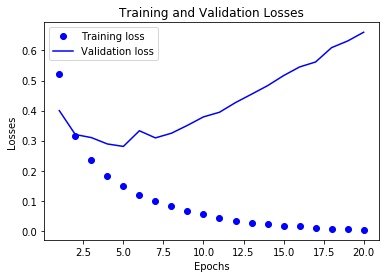

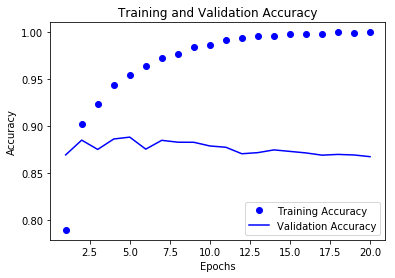

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

plt.figure(1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and Validation Losses")
plt.xlabel("Epochs")
plt.ylabel('Losses')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [0]:
# try a simpler network

# Create a NN model
from keras import models
from keras import layers


model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy',
            metrics=['accuracy'])

# train the model
print("Training the model ... Wait!")
history2 = model2.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512, 
                   validation_data=(x_val, y_val),
                   verbose=0)
print("training ends ....")

# Evaluate the model on test data
results = model2.evaluate(x_test, y_test)
print("Loss on test dataset: ", results[0])
print("Accuracy on test dataset: ", results[1])
print("\n")


Training the model ... Wait!
training ends ....
25000/25000 [==============================] - 2s 67us/step
Loss on test dataset:  0.4202020043563843
Accuracy on test dataset:  0.86696




dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


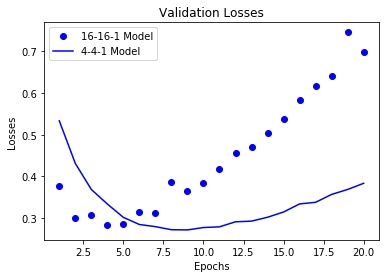

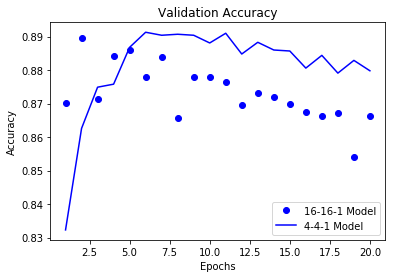

In [0]:

history_dict2 = history2.history
print(history_dict2.keys())


loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
acc_values2 = history_dict2['acc']
val_acc_values2 = history_dict2['val_acc']

epochs = range(1, len(loss_values2)+1)

plt.figure(1)
plt.plot(epochs, val_loss_values, 'bo', label='16-16-1 Model')
plt.plot(epochs, val_loss_values2, 'b', label='4-4-1 Model')
plt.title("Validation Losses")
plt.xlabel("Epochs")
plt.ylabel('Losses')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(epochs, val_acc_values, 'bo', label='16-16-1 Model')
plt.plot(epochs, val_acc_values2, 'b', label='4-4-1 Model')
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Effect of Weight Regularization

* _Occam's Razor_: Given two explanations for something, the explanation most likely to be correct is the simplest one. 
* A simpler model is one where the distribution of parameter values has less entropy (model with fewer parameters or having less values)
* Weight regularization aims at putting constraint on model complexity by forcing its weights to take small values.


Try these regularizers

- `regularizers.l1(0.001)`
- `regularizers.l1_l2(l1=0.001, l2=0.001)`
- `regularizers.l2(0.0001)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Training is in progress .... Wait!
Training ends ...
25000/25000 [==============================] - 2s 92us/step
Loss on test dataset:  0.511763549451828
Accuracy on test dataset:  0.8646


[[0.24529415]
 [0.9833157 ]
 [0.77662784]
 ...
 [0.10706243]
 [0.09950894]
 [0.29578298]]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


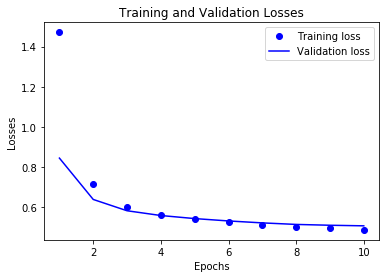

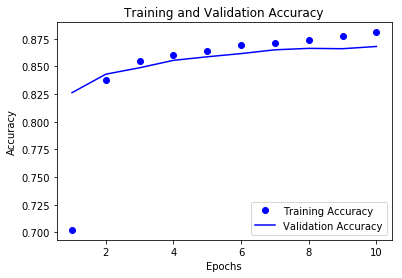

In [0]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,), 
                      kernel_regularizer=regularizers.l1_l2(0.001, 0.001)))
model.add(layers.Dense(16, activation='relu', 
          kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
model.add(layers.Dense(1, activation='sigmoid', 
                      kernel_regularizer=regularizers.l1_l2(0.001, 0.001)))

model.compile(optimizer='adam', loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()


# train the model
print('Training is in progress .... Wait!')
history = model.fit(partial_x_train, partial_y_train,
                   epochs=10, batch_size=512, 
                   validation_data=(x_val, y_val), verbose=0)
print('Training ends ...')

# Evaluate the model on test data
results = model.evaluate(x_test, y_test)
print("Loss on test dataset: ", results[0])
print("Accuracy on test dataset: ", results[1])
print("\n")

# Predict the output
print(model.predict(x_test))


import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

plt.figure(1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and Validation Losses")
plt.xlabel("Epochs")
plt.ylabel('Losses')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



### Effect of Dropout

- invented by Geoff Hinton at UoT
- Dropout, applied to a layer, consists of randomly _dropping out_ (setting to zero) a number of output features of the layer during training. 
- The _dropout rate_ is the fraction of features that are zeroed out. It's usually set between 0.2 and 0.5
- At test time, no units are dropped out; instead, the layer's output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.


In [0]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy',
            metrics=['accuracy'])

# train the model
print("Training the model ... Wait!")
history3 = model3.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512, 
                   validation_data=(x_val, y_val),
                   verbose=0)
print("training ends ....")

# Evaluate the model on test data
results = model3.evaluate(x_test, y_test)
print("Loss on test dataset: ", results[0])
print("Accuracy on test dataset: ", results[1])
print("\n")

Training the model ... Wait!
training ends ....
25000/25000 [==============================] - 2s 67us/step
Loss on test dataset:  0.5993143529856205
Accuracy on test dataset:  0.8742




dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


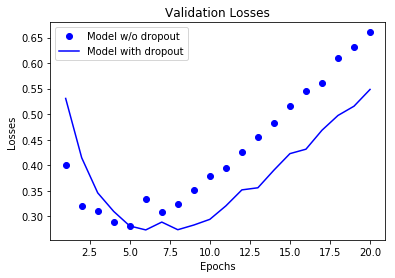

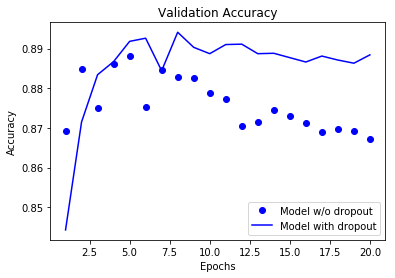

In [0]:
history_dict3= history3.history
print(history_dict3.keys())


loss_values3 = history_dict3['loss']
val_loss_values3 = history_dict3['val_loss']
acc_values3 = history_dict3['acc']
val_acc_values3 = history_dict3['val_acc']

epochs = range(1, len(loss_values3)+1)

plt.figure(1)
plt.plot(epochs, val_loss_values, 'bo', label='Model w/o dropout')
plt.plot(epochs, val_loss_values3, 'b', label='Model with dropout')
plt.title("Validation Losses")
plt.xlabel("Epochs")
plt.ylabel('Losses')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(epochs, val_acc_values, 'bo', label='Model w/o dropout')
plt.plot(epochs, val_acc_values3, 'b', label='Model with dropout')
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Reuter dataset


We only use the first 10,000 words as input and classify this input text into 46 different topics. So, it is a **multi-class** classification problem. 

* We need to understand "categorical encoding" or "one-hot encoding"
* 'softmax' provides probability distribution over 46 output classes. 
* In this case, it is better to use 'categorical_crossentropy' as the loss function.
* information blockage reduces the network performance. Number of neurons in a hidden layer should be greater than the number of output. 


In [0]:
from keras.datasets import reuters
import numpy as np

# Load Reuter Review dataset

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old
# #-------------------------------



In [0]:
# Run the previous Cell before executing this one
# Analyze the data

print("shape of train_data:", np.shape(train_data))
print("shape of test_data:", test_data.shape)
print("train_data[10]:", train_data[10])
print("train_labels[10]:", train_labels[10])


word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in 
                             train_data[10]])
print("Decoded Text:", decoded_newswire)


# Prepare the data 
def vectorize_sequences(sequences, dimension=10000): 
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):  
    results[i, sequence] = 1.  
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print("shape of one_hot_train_labels:", one_hot_train_labels.shape)
print("shape of one_hot_test_labels:", one_hot_test_labels.shape)

shape of train_data: (8982,)
shape of test_data: (2246,)
train_data[10]: [1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
train_labels[10]: 3
Decoded Text: ? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3
shape of one_hot_train_labels: (8982, 46)
shape of one_hot_test_labels: (2246, 46)


Training in progress ... Wait!
Training ends here ..
2246/2246 [==============================] - 0s 128us/step
Evaluation results on test data (loss, accuracy): [1.2064472032463773, 0.784951024095819]


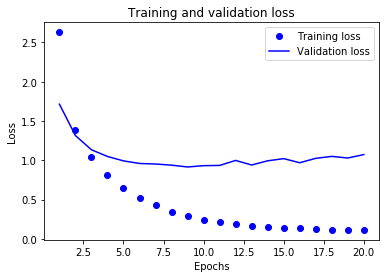

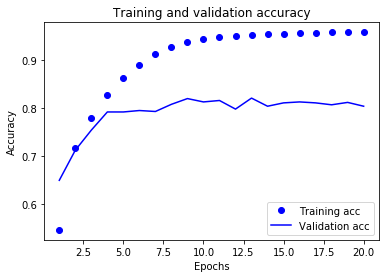

In [0]:
# run the previous cell before executing this cell.

# Build the model
from keras import models
from keras import layers

# You can change the dimension of second layer to 4 to see the effect
# of information blockage
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])

# set aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train =  one_hot_train_labels[1000:]

# train the model
print("Training in progress ... Wait!")
history = model.fit(partial_x_train, partial_y_train, epochs=20, 
                    batch_size=512, validation_data=(x_val, y_val),
                   verbose=0)
print("Training ends here ..")


# Evaluate the model
results = model.evaluate(x_test, one_hot_test_labels)
print("Evaluation results on test data (loss, accuracy):", results)


import matplotlib.pyplot as plt
plt.figure(1)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




## Regression with Keras

### Boston Housing dataset

* Here we demonstrate the use of k-fold validation for a regression task. 

* k-fold validation is carried out when there is a very small dataset available for training.

* mean squared error (MSE) is used as a loss function for regression.

* Evaluation metrics used for regression is different from those used for classification.

* When input data have values in different range, it is a good practice to scale or normalize them appropriately. 




In [0]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print("train_data shape:", train_data.shape)
print("train_data shape:", test_data.shape)
#print("train_targets:", train_targets)
print("train_targets shape:", train_targets.shape)


# Normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std


# Build your network
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
                        input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  
  return model



# K-fold validation
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  
  partial_train_data = np.concatenate(
  [train_data[:i*num_val_samples], 
  train_data[(i+1)*num_val_samples:]], axis = 0)
  
  partial_train_targets = np.concatenate(
  [train_targets[:i*num_val_samples],
  train_targets[(i+1)*num_val_samples:]], axis = 0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, 
            epochs = num_epochs, batch_size = 1, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)
  mae_history = history.history['mean_absolute_error']
  all_mae_histories.append(mae_history)
  

57344/57026 [==============================] - 0s 1us/step
train_data shape: (404, 13)
train_data shape: (102, 13)
train_targets shape: (404,)
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


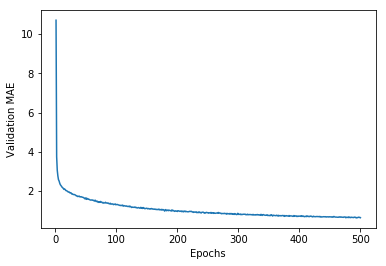

In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

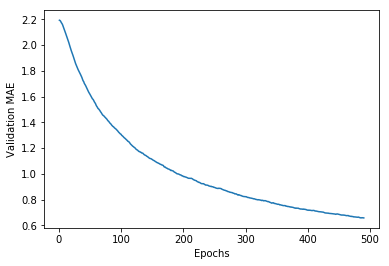

In [0]:
def smooth_curve(points, factor=0.9): 
  smoothed_points = [] 
  for point in points: 
    if smoothed_points: 
      previous = smoothed_points[-1] 
      smoothed_points.append(previous * factor + point * (1 - factor)) 
    else: 
      smoothed_points.append(point) 
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Convolution Neural Networks / ConvNets



### MNIST handwritten digit recognition dataset

- The problem is to classify grayscale images of handwritten digits (28x28 pixels) into 10 categories (0 through 9).
- It has 60,000 training images and 10,000 test images
- First we will try a 2 layer FC (dense) neural network which gives around 97.8% accuracy on the test set. 


train images shape: (60000, 28, 28)
test images shape: (10000, 28, 28)
train_labels: [5 0 4 ... 5 6 8]
length of train labels: 60000
length of test labels: 10000
test_labels: [7 2 1 ... 4 5 6]
train image datatype: uint8


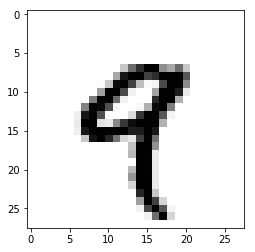

Epoch 1/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.2708 - acc: 0.9227
Epoch 2/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.1097 - acc: 0.9681
Epoch 3/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.0709 - acc: 0.9788
Epoch 4/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.0503 - acc: 0.9854
Epoch 5/5
10000/10000 [==============================] - 1s 53us/step
test_acc: 0.9784


In [0]:

# load the dataset
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

# Analyze the dataset
print("train images shape:", train_images.shape)
print("test images shape:", test_images.shape)
print("train_labels:", train_labels)
print("length of train labels:", len(train_labels))
print("length of test labels:", len(test_labels))
print("test_labels:", test_labels)
print("train image datatype:", train_images.dtype)

import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


from keras import models
from keras import layers

# Build the model
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam', loss = 'categorical_crossentropy',
               metrics=['accuracy'])

# prepare the dataset
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# train the network
network.fit(train_images, train_labels, epochs=5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)


- Here we will try a convnet for the above multi-label classification problem. 
- It gives an accuracy of 99.1% which is significantly higher than the previous network. 

The key characteristics of ConvNets are:
- The pattern learnt by convnets are translation invariant.
- They can learn spatial hierarchies of patterns
- Convolutions operate over 3D tensors (feature maps): Width x height x depth (or channels)
- output depth of a conv layer refers to the number of filters being applied. 
- Convolution filter has two key parameters: filter size (3x3) and filter depth (32)
- output feature map size depends on filter _size_ and _strides_
- _padding_ can be used to obtain same spatial dimension for output feature map.





In [0]:
# load the dataset
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Prepare / process the dataset
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# build a ConvNet Model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

# train the network
model.fit(train_images, train_labels, epochs=5, batch_size=64)

#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test Accuracy: ", test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                36928     
__________

## Text Processing with deep Learning



In [0]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1

print(token_index)

max_length = 10

results = np.zeros(shape = (len(samples), max_length,
                           max(token_index.values())+1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1

print(results)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [0]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'the dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('shape of one_hot_results:', np.shape(one_hot_results))

Found 9 unique tokens.
shape of one_hot_results: (2, 1000)


In [0]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20


#--------------------------------------------
import numpy as np
from keras.datasets import imdb

# Load IMDB Review dataset

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words = max_features)

# restore np.load for future normal usage
np.load = np_load_old
# #-------------------------------




#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


print('shape of x_train:', shape(x_train))
print('shape of x_test:', shape(x_test))

TypeError: ignored